In [25]:
!pip install tensorflow tensorflow-hub

In [27]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image, ImageFilter
import io

In [28]:
def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"Uploaded file: {filename}")
    return Image.open(io.BytesIO(uploaded[next(iter(uploaded))]))

In [29]:
def process_image(image, target_size=(384, 384)):
    image = image.resize(target_size)
    image = np.array(image).astype(np.float32)[np.newaxis, ...] / 255.0
    return image

In [30]:
def transfer_style(content_image, style_image, model):
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    return np.array(stylized_image)

In [31]:
def sharpen_image(image):
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    sharpened_image = pil_image.filter(ImageFilter.SHARPEN)
    return np.array(sharpened_image) / 255.0


In [53]:
print("👉 Upload Content Image")
content_img = upload_image()

👉 Upload Content Image


Saving feather.jpg to feather.jpg
Uploaded file: feather.jpg


In [66]:
print("👉 Upload Style Image")
style_img = upload_image()


👉 Upload Style Image


Saving waves.png to waves.png
Uploaded file: waves.png


In [67]:
content_image = process_image(content_img, target_size=(384, 384))
style_image = process_image(style_img, target_size=(256, 256))

In [68]:
print("🚀 Loading Model...")
model_url = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_model = hub.load(model_url)

🚀 Loading Model...


In [69]:
print("🎨 Applying Style...")
output_image = transfer_style(content_image, style_image, hub_model)
output_image = np.squeeze(output_image)

🎨 Applying Style...


In [70]:
output_image_sharpened = sharpen_image(output_image)


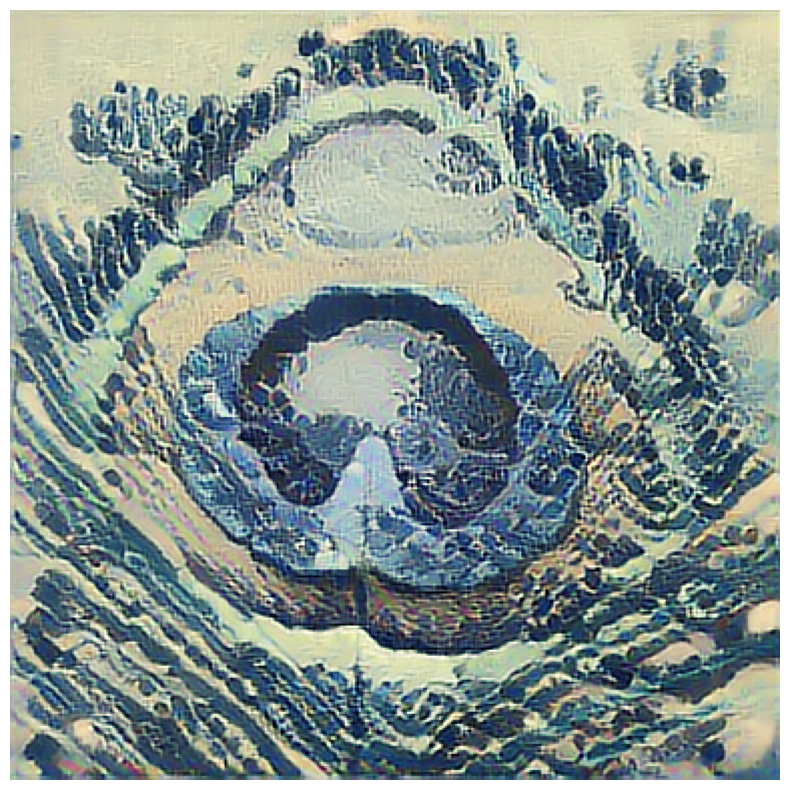

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(output_image_sharpened)
plt.axis('off')
plt.show()

In [72]:
output_path = '/content/stylized_result.jpeg'
plt.imsave(output_path, output_image_sharpened)
print(f"✅ Stylized image saved as: {output_path}")

✅ Stylized image saved as: /content/stylized_result.jpeg
